In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm


data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment-02/data-nonlinear.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]


x_label0    = x[label == 0]
y_label0    = y[label == 0]

x_label1    = x[label == 1]
y_label1    = y[label == 1]

lb_0 = np.column_stack([x_label0, y_label0, np.zeros(len(x_label0))])
lb_1 = np.column_stack([x_label1, y_label1, np.ones(len(x_label1))])


train_set = np.vstack([lb_0,lb_1])


In [0]:
functions =[lambda x,y: 1, lambda x,y: x, lambda x,y: y, lambda x,y: x*y,    \
                lambda x,y: x**2, lambda x,y: y**2, lambda x,y: y**4, lambda x,y: y**4, lambda x,y: y**2 * x**2,   \
            lambda x,y: x**2 * y **6 ,lambda x,y: x**6 * y**2,lambda x,y: x**6,lambda x,y: y**6,lambda x,y: x**4 * y**4, \
            lambda x,y: x**8,lambda x,y: y**8]


def f(data):
    result = []
    for func in functions:
        result.append(list(map(func, data[0,:], data[1,:])))
    return np.array(result)

def partialDiff(j):
    return list(map(functions[j], train_set[:,0], train_set[:,1]))


In [0]:
alpha = 3
m = len(train_set)

def z(th, x):
    return np.matmul(th,f(x))
def h(th, x):
    return 1 / (1 +np.exp(-z(th, x)))
def J(th, data): 
    return (1/(m)) * np.sum(                                                   \
        - data[:,2] * np.log(h(th,np.transpose(data[:,0:2])))                  \
        - (1-data[:,2]) * np.log(1 - h(th,np.transpose(data[:,0:2])))          \
        )
def accuracy():
    answer = train_set[:,2]
    guess = np.around(h(g_th,np.transpose(train_set[:,0:2])))
    return np.sum(np.equal(answer, guess)) / m


def th_cal(th):
    result = []
    diff = (h(th, np.transpose(train_set[:,0:2])) - train_set[:,2])
    for j in range(len(th)):
        result.append( th[j]-(alpha * (1/m) * np.sum(  diff * partialDiff(j) )) )
    return np.array(result)


In [0]:
g_th = np.array([4,1,1,2,1,1,2,1,1,4,1,1,2,1,1,2])
J_log_train = [J(g_th, train_set)]
th_log = [g_th]
accuracy_log = [accuracy()]

# import sys
e = 5*10 ** (-14)

In [61]:
from tqdm.notebook import tqdm
for i in tqdm(range(2000)):
    g_th = th_cal(g_th)
    J_log_train.append(J(g_th, train_set))
    th_log.append(g_th)
    accuracy_log.append(accuracy())
    if abs(J(g_th, train_set) - J_log_train[-2]) <=e and np.sum (g_th -th_log[-2]) <= 4*e:
        break




---



#로지스틱 회귀 실습

##### 1. Plot the training data [2pt]
- plot the training data points $(x, y)$ with their labels $l$ in colors (blue for label 0 and red for label 1)




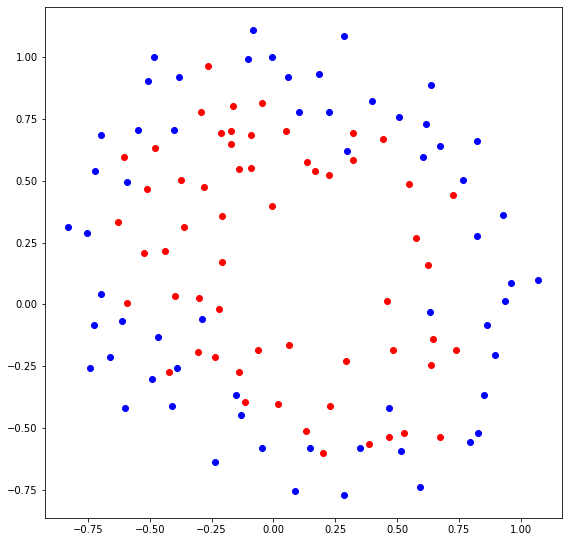

In [63]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


##### 2. Write down the high dimensional function $g(x, y; \theta)$ [2pt]
- write down the equation for the non-linear function $g(x, y; \theta)$ used for the classifier in LaTeX format  

$$
let F = (f_0(x,y), f_1(x,y), f_2(x,y), f_3(x,y),\dots) \\
f_0(x,y) = 1 \\
f_1(x,y) = x \\
f_2(x,y) = y \\
f_3(x,y) = xy \\
f_4(x,y) = x^2 \\
f_5(x,y) = y^2 \\
f_6(x,y) = x^4 \\
f_7(x,y) = y^4 \\
f_8(x,y) = x^2y^2 \\
f_9(x,y) = x^2y^6 \\
f_{10}(x,y) = x^6y^2 \\
f_{11}(x,y) = x^6 \\
f_{12}(x,y) = y^6 \\
f_{13}(x,y) = x^4y^4 \\
f_{14}(x,y) = x^8 \\
f_{15}(x,y) = y^8 \\
g(x, y ; \theta) = \theta_{0} f_{0}(x, y) + \theta_{1} f_{1}(x, y) + \cdots + \theta_{k-1} f_{k-1}(x, y) = \theta \cdot F
$$



##### 3. Plot the training error [3pt]
- plot the training error $J(\theta_0, \theta_1, \theta_2)$ at every iteration of gradient descent until convergence (in blue color)



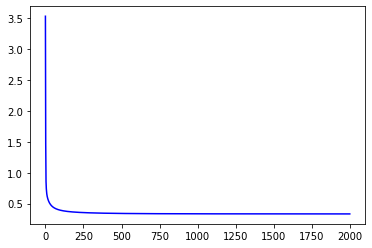

In [64]:
plt.plot(J_log_train,c='blue')
plt.show()

##### 4. Plot the training accuracy [3pt]
- plot the training accuracy at every iteration of gradient descent until convergence (in red color)



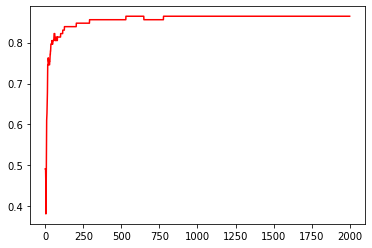

2001

In [65]:
plt.plot(accuracy_log,c='red')
plt.show()
len(accuracy_log)

##### 5. Write down the final training accuracy [2pt]
- present the final training accuracy in number (%) at convergence


In [68]:
print(accuracy()*100,"%")

86.4406779661017 %



##### 6. Plot the optimal classifier superimposed on the training data [5pt]
- plot the boundary of the optimal classifier at convergence (in green color)
- the boundary of the classifier is defined by $\{ (x, y) \mid \sigma(g(x, y ; \theta)) = 0.5 \} = \{ (x, y) \mid g(x, y ; \theta) = 0 \}$
- plot the training data points $(x, y)$ with their labels $l$ in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
- you can use `contour` function in python3


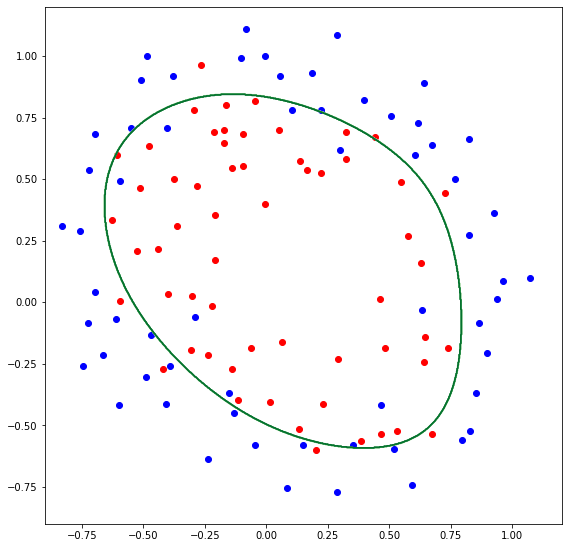

In [67]:
X, Y = np.meshgrid(np.linspace(-0.9, 1.2, 1000), np.linspace(-0.9, 1.2, 1000))


Z = np.array([  np.around( h(g_th, np.array([x,y]) ) )      for x,y in zip(X,Y)  ])

plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, cmap='Greens')

plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')


plt.show()

